# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def vizHistory(historyData):
    fig = plt.figure(figsize=(10, 5))
    ax0 = fig.add_subplot(1,2, 1)
    ax0.set_title('Loss')
    ax0.grid()
    ax0.set_xlabel('Epochs')
    ax0.set_ylabel('Loss')
    ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
    ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
    ax0.legend()

    ax1 = fig.add_subplot(1,2, 2)
    ax1.set_title('Accuracy')
    ax1.grid()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
    ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
    ax1.legend()

## Network_Classification

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from enum import Enum

TYPE_NETWORK_LIST = ('ANN','CNN')
TYPE_NETWORK = Enum('TYPE_NETWORK', TYPE_NETWORK_LIST)

class Network_Classification:
    def __init__(self, X_train, y_train, X_test, y_test, inputShape, typeNetwork = TYPE_NETWORK.ANN):
        self.classNum = np.unique(y_train).shape[0]
        self.X_train = X_train
        self.X_test = X_test

        self.y_train = to_categorical(y_train)
        self.y_test = to_categorical(y_test)

        self.model = Sequential()
        if typeNetwork == TYPE_NETWORK.CNN:
            # input layer
            self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=inputShape))
            self.model.add(MaxPooling2D((2, 2)))
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(MaxPooling2D((2, 2)))
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(Flatten())
            # self.model.add(Dropout(0.25))
            self.model.add(Dense(64, activation='relu'))
            self.model.add(Dense(10))
        else:
            # input layer
            self.model.add(Flatten(input_shape=inputShape))
            self.model.add(Dense(64,activation="relu"))
            # self.model.add(Dropout(0.25))
            self.model.add(BatchNormalization())

            self.model.add(Dense(32, activation='relu'))
            # self.model.add(Dropout(0.5))
            # self.model.add(BatchNormalization())

        # output layer
        self.model.add(Dense(self.classNum, activation='softmax'))
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer='adam', 
            metrics=['accuracy']
        )
        print(self.model.summary())
    def fit(self, epochs = 50):
        self.hist = self.model.fit(
            self.X_train, self.y_train, 
            validation_data=(self.X_test, self.y_test),
            epochs=epochs, 
            batch_size=100,
            verbose=1
            )
        self.score()
    def score(self):
        print('train data: ', self.model.evaluate(self.X_train, self.y_train)[1])
        print('test data: ', self.model.evaluate(self.X_test, self.y_test)[1])
    def predict(self, X_test):
        return self.model.predict(X_test)
    def history(self):
        vizHistory(self.hist.history)


In [8]:
# https://keras.io/api/datasets/mnist/
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ', X_train.shape)
print('Y_train: ', y_train.shape)
print('X_test:  ' , X_test.shape)
print('Y_test:  ' , y_test.shape)

model = Network_Classification(X_train, y_train, X_test, y_test, (28, 28))
model.fit(epochs=5)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,906
Trainable params: 52,778
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/5
600/600 [==

In [9]:
model.score()

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9866
train data:  0.9866333603858948
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9730
test data:  0.9729999899864197


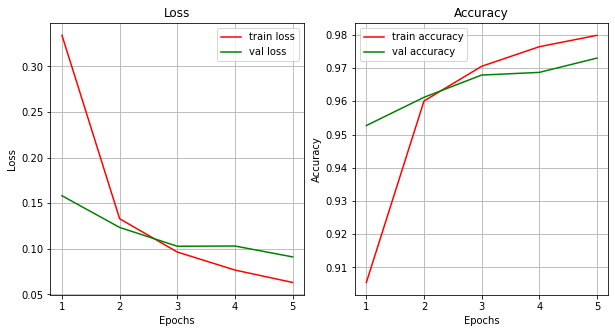

In [10]:
model.history()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

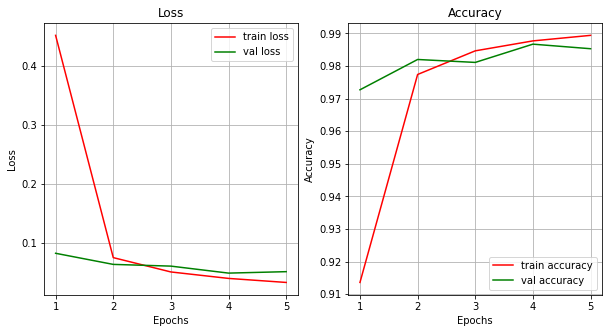

In [11]:
X_train_Reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_Reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))

model = Network_Classification(X_train_Reshaped, y_train, X_test_Reshaped, y_test, (28, 28, 1), TYPE_NETWORK.CNN)
model.fit(epochs=5)
model.history()

In [12]:
# https://keras.io/api/datasets/fashion_mnist/
from keras.datasets import fashion_mnist

CLASS = {
    0:	"T-shirt/top",
    1:	"Trouser",
    2:	"Pullover",
    3:	"Dress",
    4:	"Coat",
    5:	"Sandal",
    6:	"Shirt",
    7:	"Sneaker",
    8:	"Bag",
    9:	"Ankle boot"
}

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('X_train: ', X_train.shape)
print('Y_train: ', y_train.shape)
print('X_test:  ' , X_test.shape)
print('Y_test:  ' , y_test.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,906
Trainable params: 52,778
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.5230 - accuracy: 0.8185 - val_los

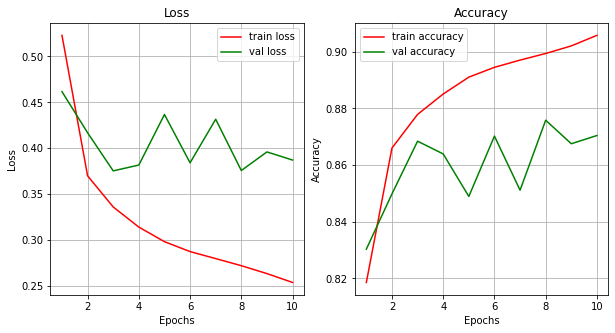

In [13]:
model = Network_Classification(X_train, y_train, X_test, y_test, (28, 28))
model.fit(epochs=10)
model.history()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

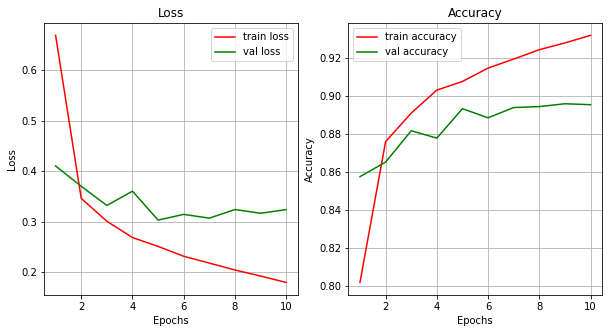

In [14]:
X_train_Reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_Reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))

model = Network_Classification(X_train_Reshaped, y_train, X_test_Reshaped, y_test, (28, 28, 1), TYPE_NETWORK.CNN)
model.fit(epochs=10)
model.history()

In [15]:
# https://keras.io/api/datasets/cifar10/
from keras.datasets import cifar10

CLASS = {
    0: "airplane",
    1:	"automobile",
    2:	"bird",
    3:	"cat",
    4:	"deer",
    5:	"dog",
    6:	"frog",
    7:	"horse",
    8:	"ship",
    9:	"truck",
}

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train: ', X_train.shape)
print('Y_train: ', y_train.shape)
print('X_test:  ' , X_test.shape)
print('Y_test:  ' , y_test.shape)

X_train:  (50000, 32, 32, 3)
Y_train:  (50000, 1)
X_test:   (10000, 32, 32, 3)
Y_test:   (10000, 1)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

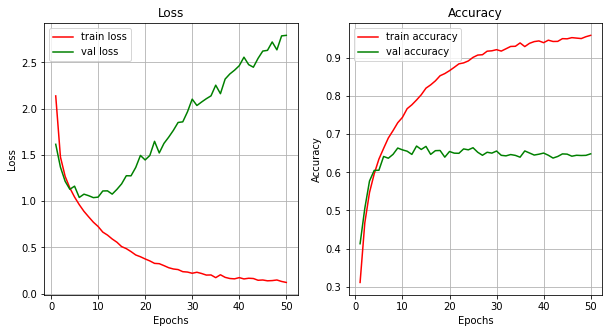

In [17]:
model = Network_Classification(X_train, y_train, X_test, y_test, (32, 32, 3), TYPE_NETWORK.CNN)
model.fit(epochs=50)
model.history()